# Complexity in complementation - Code for the propject
This Notebook contains the code utilized in the Thesis project 'Complexity in Complementation'. The language is 'R'.The code is shown in chronological order, starting with the data preprocessing and finishing with the graphic representation of the results of the statistical experiments performed.
This experiment is part of the thesis project 'Exploring Complementation Choices in Eighteenth-Century Late Modern English: A Corpus Study', part of the bigger project 'Complexity in Complementation'lead by Peter Petré, part of the University of Antwerp.

## 0 - Importing libraries

Before starting any preprocessing is necessary to import the libraries that will be further used during all the analysis.

In [ ]:
#library(grid)
library(party)
#library(rattle)
library(Hmisc)
#library(pROC)
#library(MLmetrics)
library(varImp)
#library(caret)
library(dplyr)
#library(ROSE)
library(ggplot2)

### 1 - Preprocessing

In [ ]:
#Loading dataset and defining names of columns
df = read.delim('C:/Users/valer/OneDrive/Escritorio/Thesis/new/Ravest_data_20233006_withoutextrapositions.csv', sep=';')
df1 = df[c('voice', 'anim', 'neg', 'main','cc_means', 'complementation_cxn', 'lemma', 'denote', 'length_of_clause', 'author','authorid')]

In [ ]:
#Renaming variables fr better readability
df1$complementation_cxn[df1$complementation_cxn == "0-complementizer"] <- "b"
df1$complementation_cxn[df1$complementation_cxn == "ing-cc"] <- "d"
df1$complementation_cxn[df1$complementation_cxn == "that-clause"] <- "a"
df1$complementation_cxn[df1$complementation_cxn == "to-infinitive"] <- "c"

In [ ]:
#Subsetting per author
print(table(df1$author))

In [ ]:
   Berkeley, George      Boswell, James       Burke, Edmund      Colman, George 
                 30                   9                 102                  55 
Cumberland, Richard     Dibdin, Charles      Gibbon, Edward     Hayley, William 
                108                  92                  55                  14 
    Johnson, Samuel     Pinkerton, John     Pope, Alexander  Richardson, Samuel 
                  9                  32                  32                 227 
      Trusler, John      Warton, Thomas 
                 69                  25 
 
#>50 out: Berkeley, Boswell, Hayley, Johnson, Pinkerton, Pope, Warton
# Further in the analyses we will leave out those authors with a frequency lower to 50, since the sample is not representative

In [ ]:
df1 <- transform(df1,authorFrequency=ave(seq(nrow(df1)),author,FUN=length))

In [ ]:
#Replacing names for numbers to improve readibility
df1$author[df1$author=='Berkeley, George'] <- "1"
df1$author[df1$author=='Boswell, James'] <- "2"
df1$author[df1$author=='Burke, Edmund'] <- "3"
df1$author[df1$author=='Colman, George'] <- "4"
df1$author[df1$author=='Cumberland, Richard'] <- "5"
df1$author[df1$author=='Dibdin, Charles'] <- "6"
df1$author[df1$author=='Gibbon, Edward'] <- "7"
df1$author[df1$author=='Hayley, William'] <- "8"
df1$author[df1$author=='Johnson, Samuel'] <- "9"
df1$author[df1$author=='Pinkerton, John'] <- "10"
df1$author[df1$author=='Pope, Alexander'] <- "11"
df1$author[df1$author=='Richardson, Samuel'] <- "12"
df1$author[df1$author=='Trusler, John'] <- "13"
df1$author[df1$author=='Warton, Thomas'] <- "14"

In [ ]:
#Changing the datatypes to factors
columns <- c("voice", "anim", "neg", "main", "cc_means", "complementation_cxn", "lemma", "denote", "author", "authorid")

for (col in columns) {
  df1[[col]] <- as.factor(df1[[col]])
}

In [ ]:
#We only select few subjects to participate in the sample due of representativity

#berkeley <- df1[ which(df1$author=='1'), ]
#boswell <- df1[ which(df1$author=='2'), ]
burke <- df1[ which(df1$author=='3'), ]
colman <- df1[ which(df1$author=='4'), ]
cumberland <- df1[ which(df1$author=='5'), ]
dibdin <- df1[ which(df1$author=='6'), ]
gibbon <- df1[ which(df1$author=='7'), ]
#hayley <- df1[ which(df1$author=='8'), ]
#johnson <- df1[ which(df1$author=='9'), ]
#pinkerton <- df1[ which(df1$author=='10'), ]
#pope <- df1[ which(df1$author=='11'), ]
richardson <- df1[ which(df1$author=='12'), ]
trusler <- df1[ which(df1$author=='13'), ]
#warton <- df1[ which(df1$author=='14'), ]

Data is ready to perform the statistical analysis

### 3- Decission tree and Random forests
We will apply the models to the total group and to each subject.

In [ ]:
#Preparing for the plot, defining axes and colors for the features.
ggplot(df1, aes(x = author, y = authorFrequency )) +
  geom_bar(
    aes(complementation = complementation_cxn, fill = complementation_cxn),
    stat = "identity", position = position_stack()
    ) +
  scale_color_manual(values = c("#0000FF", "#800080", "#FFFF00", "#FFA500"))+
  scale_fill_manual(values = c("#0000FF", "#800080", "#FFFF00", "#FFA500"))




In [ ]:
#Making and plotting the tree
tree_everyone <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + author + lemma + denote + length_of_clause, data=df1)
plot(tree_everyone)

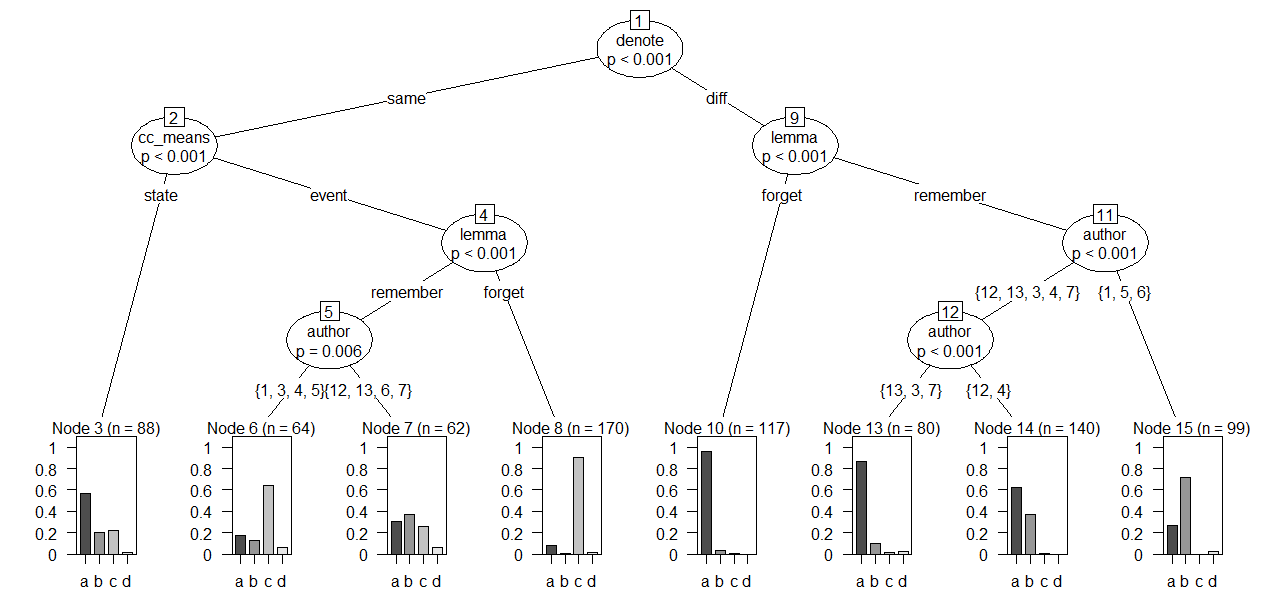

In [ ]:
#Making and plotting the forest
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + author + lemma + denote + length_of_clause, data=df1,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)



In [ ]:
                     Overall
denote           0.154117692
lemma            0.083494605
author           0.074985385
cc_means         0.045538596
length_of_clause 0.007584891
main             0.006093717
anim             0.003794082
neg              0.001751505
voice            0.001357025


ggplot(var_ordered, aes(x = reorder(Variable, Overall), y = Overall)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +
  labs(x = "Variable", y = "Importance", title = "Variable Importance in Random Forest")

In [ ]:
#### Everyone - forget

In [ ]:
forget <- df1[ which(df1$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + author + denote + length_of_clause, data=forget)
plot(tree)

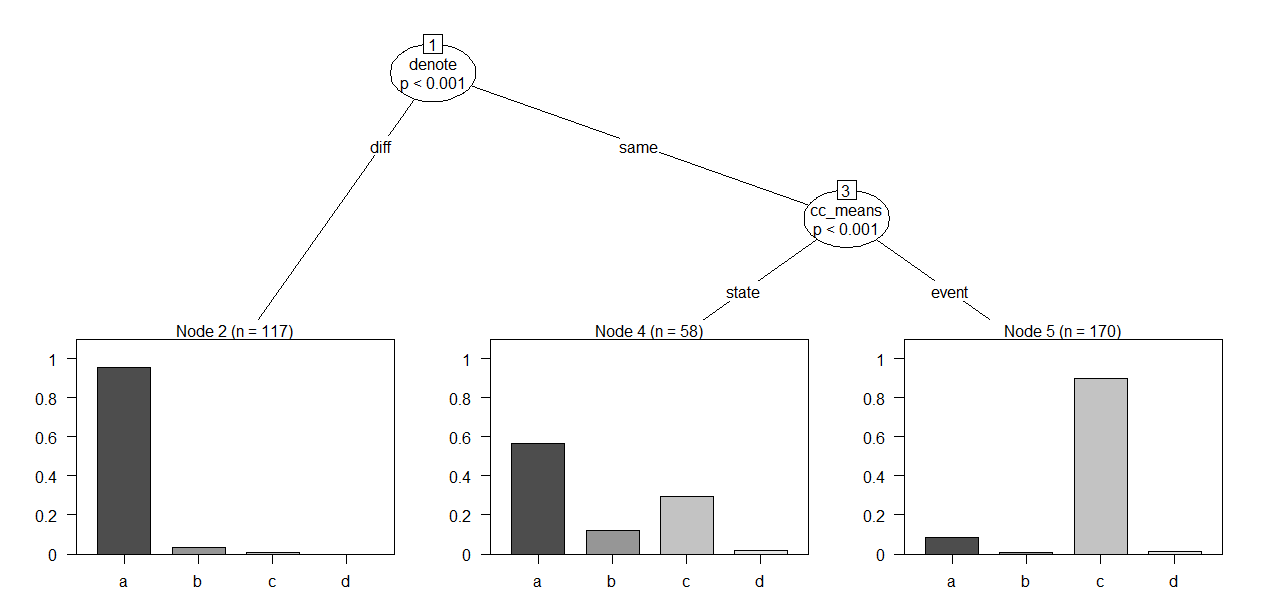

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + author + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                      Overall
denote           0.2141667719
cc_means         0.0999718048
author           0.0097461714
length_of_clause 0.0062863297
neg              0.0054672756
main             0.0027665725
voice            0.0001460346
anim             0.0001201845


In [ ]:
#### Everyone - remember

In [ ]:
remember <- df1[ which(df1$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + author + denote + length_of_clause, data=remember)
plot(tree)

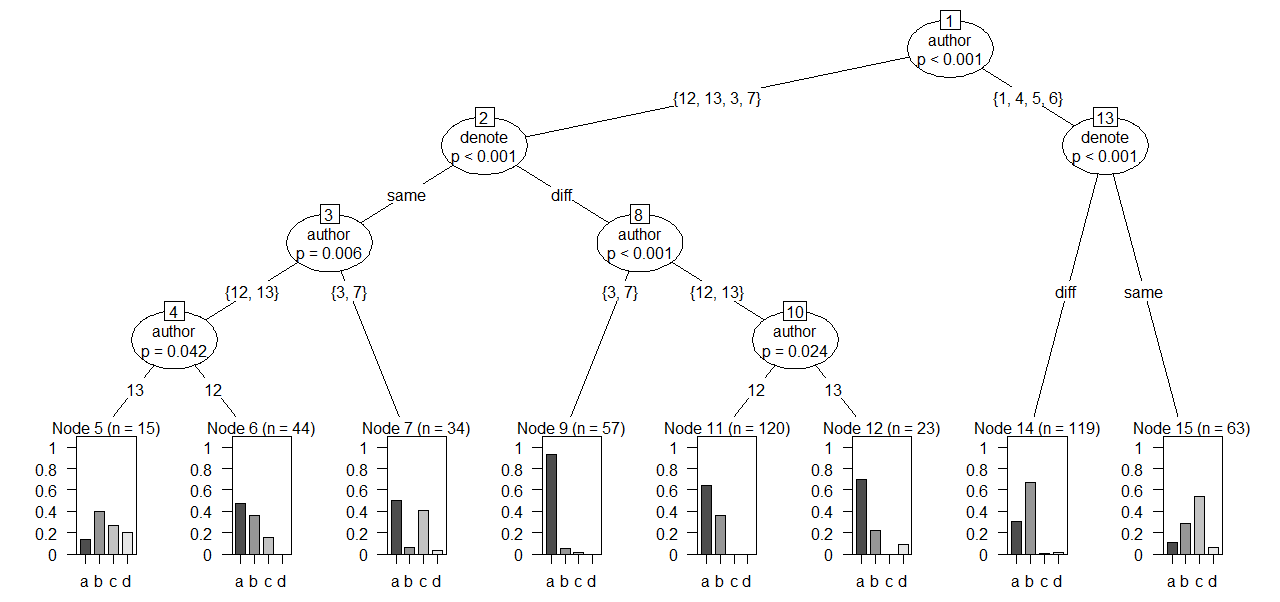

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + author + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
author            0.1259456853
denote            0.0668620755
length_of_clause  0.0082416637
cc_means          0.0079211469
anim              0.0058424287
main              0.0056684230
voice             0.0020996652
neg              -0.0009280456


### Burke

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=burke)
plot(tree)

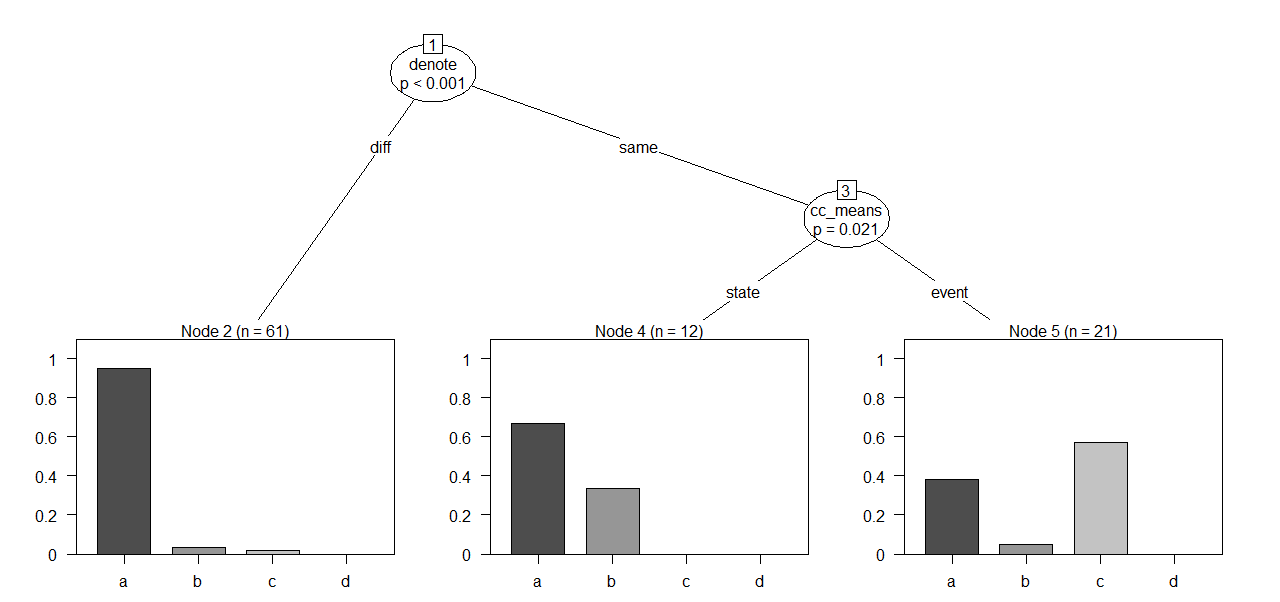

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=burke,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            7.326614e-02
cc_means          2.223398e-02
length_of_clause  5.395270e-03
main              5.099566e-03
voice             3.571429e-05
neg              -2.496203e-05
anim             -2.732385e-05
lemma            -9.657650e-04


In [ ]:
#### Burke - forget

In [ ]:
forget <- burke[ which(burke$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

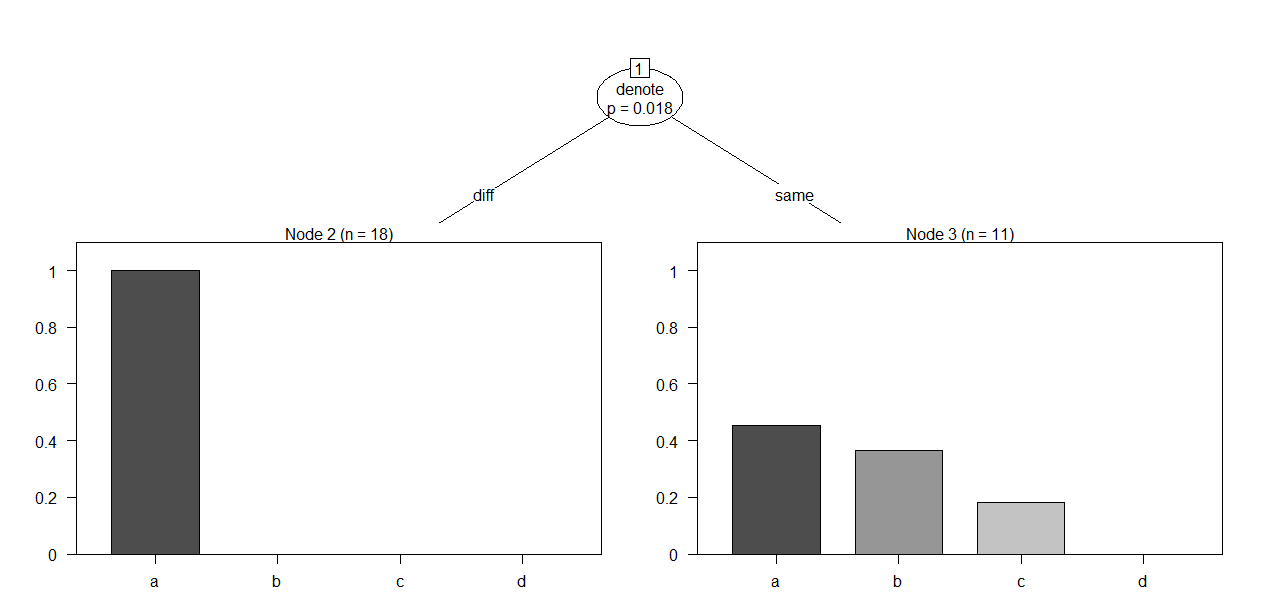

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                    Overall
denote           0.03853630
length_of_clause 0.01332168
voice            0.00000000
anim             0.00000000
neg              0.00000000
main             0.00000000
cc_means         0.00000000


In [ ]:
#### Burke - remember

In [ ]:
remember <- burke[ which(burke$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

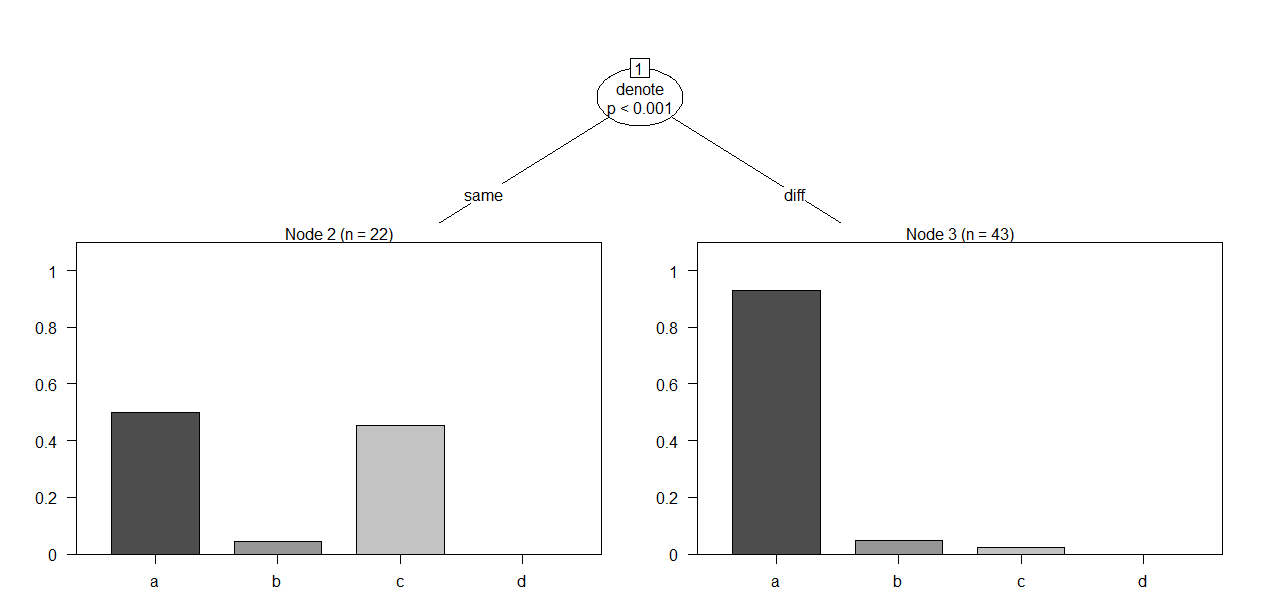

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            4.438287e-02
main              4.024811e-02
cc_means          1.275049e-03
neg               6.668157e-04
voice             2.067516e-04
anim             -4.545455e-05
length_of_clause -7.637976e-04


### Colman

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=colman)
plot(tree)

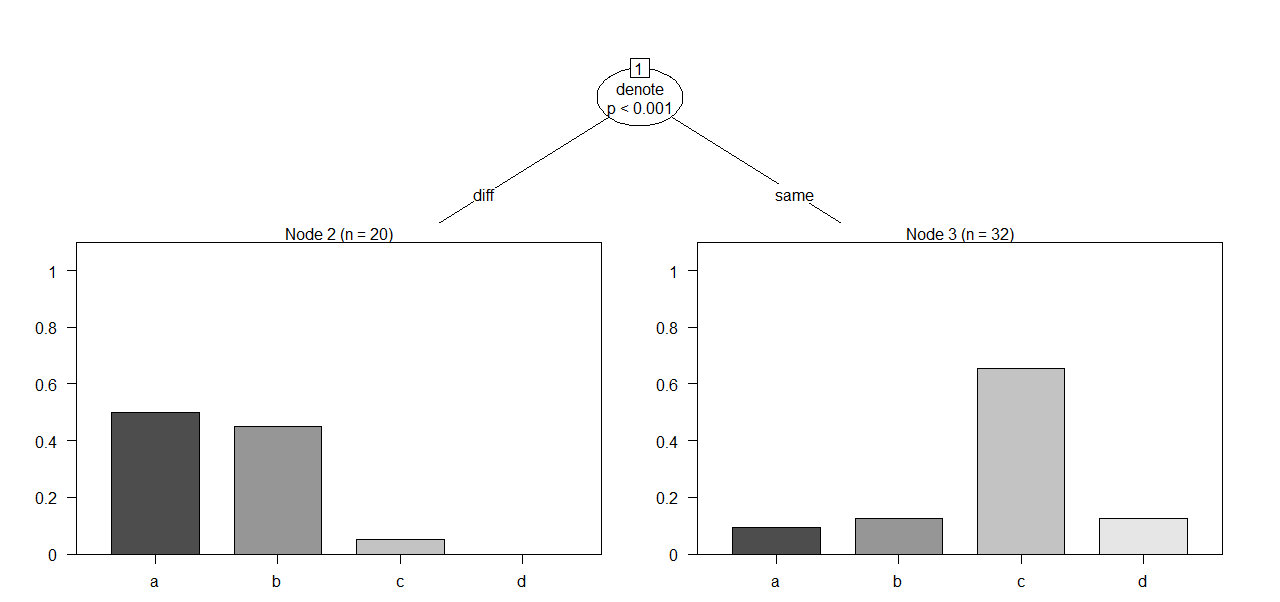

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=colman,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            1.721093e-01
length_of_clause  9.654650e-03
voice             7.428529e-03
lemma             6.904676e-03
anim              1.181610e-03
main             -5.555556e-05
neg              -1.290597e-04
cc_means         -5.090077e-03


In [ ]:
#### Colman - forget

In [ ]:
forget <- colman[ which(colman$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

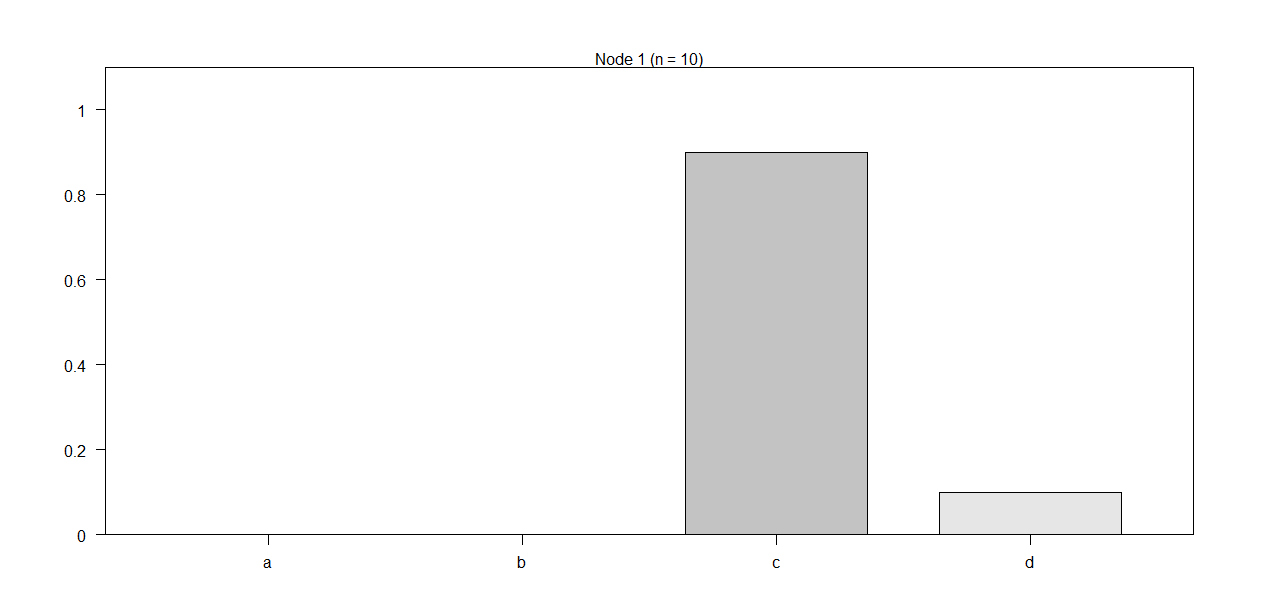

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                 Overall
voice                  0
anim                   0
neg                    0
main                   0
cc_means               0
denote                 0
length_of_clause       0


In [ ]:
#### Colman - remember

In [ ]:
remember <- colman[ which(colman$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

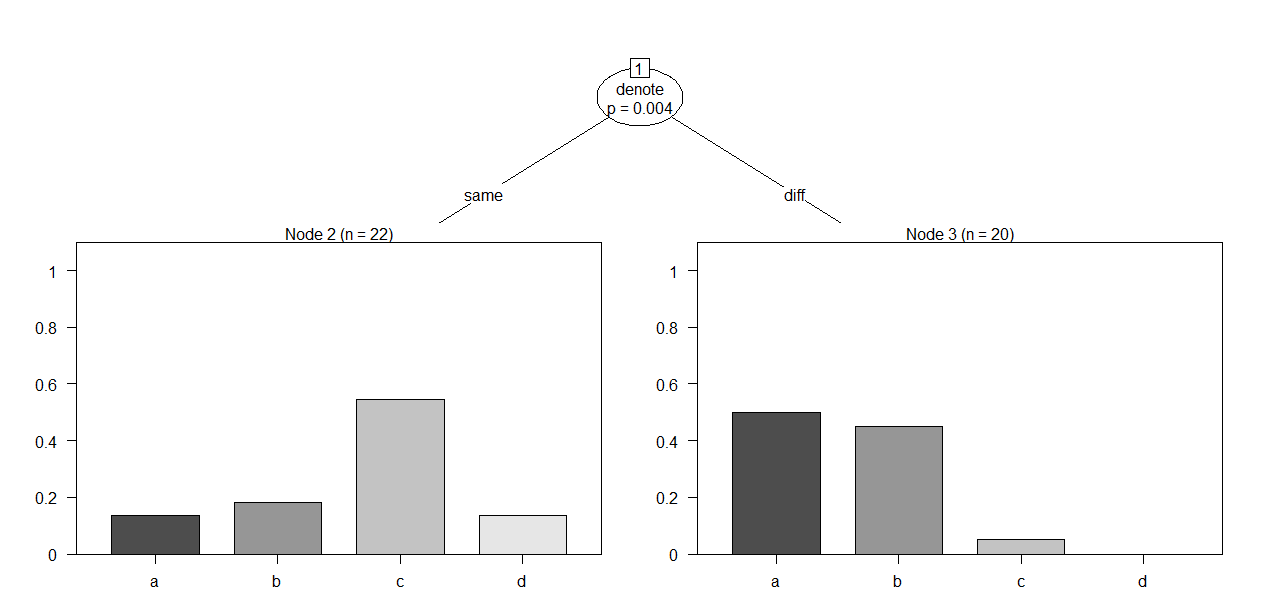

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                      Overall
denote            0.150594974
length_of_clause  0.005958979
voice             0.004513484
neg               0.000000000
main              0.000000000
anim             -0.001281668
cc_means         -0.007425201


### Cumberland

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=cumberland)
plot(tree)

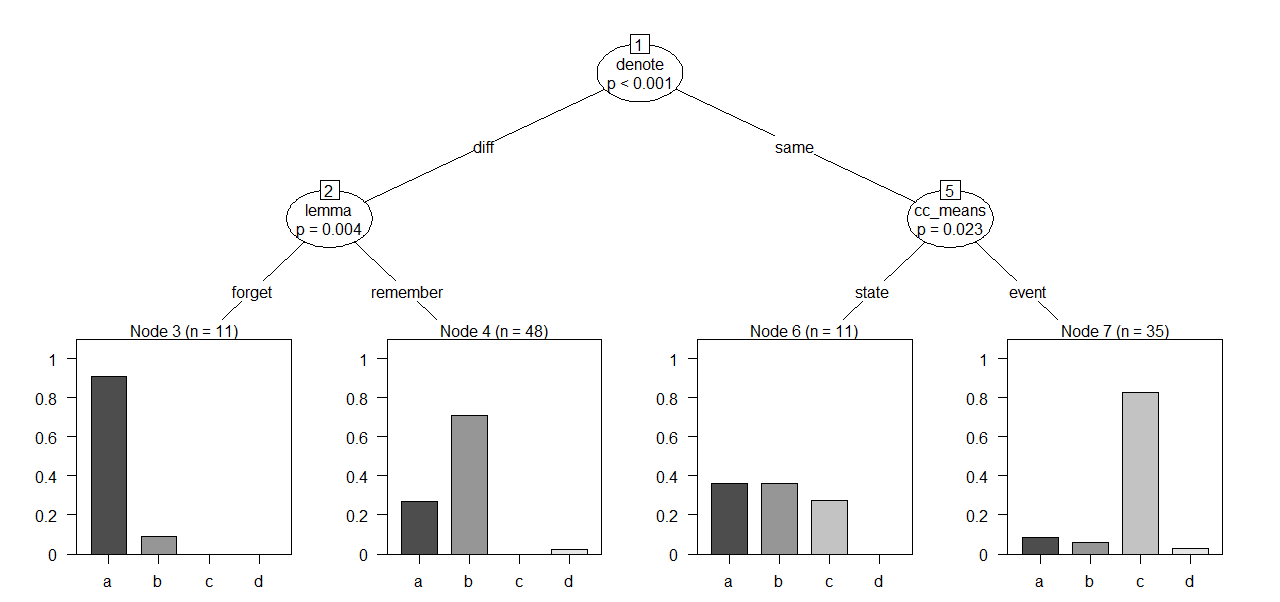

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=cumberland,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            2.145982e-01
lemma             8.928301e-02
cc_means          5.234200e-02
length_of_clause  2.116258e-03
voice             5.667551e-04
neg               3.742773e-04
main              3.314659e-06
anim             -3.281371e-03


In [ ]:
#### Cumberland - forget

In [ ]:
forget <- cumberland[ which(cumberland$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

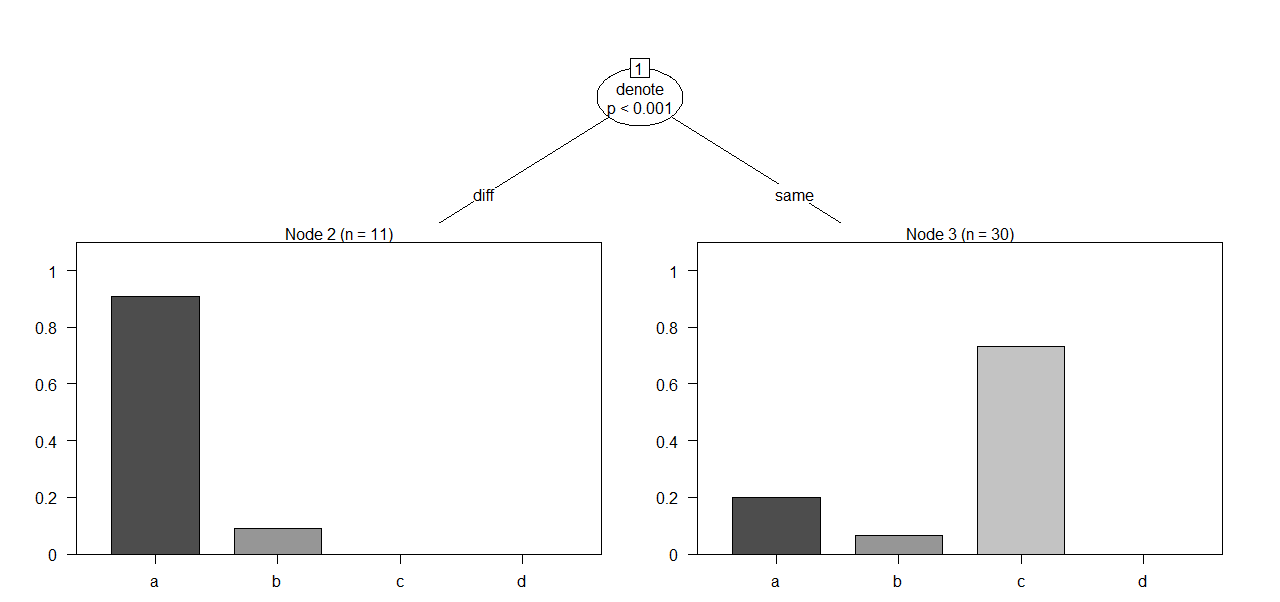

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
cc_means          0.1520231214
denote            0.1135837657
neg               0.0002509804
voice             0.0000000000
main              0.0000000000
anim             -0.0001333333
length_of_clause -0.0007480963


In [ ]:
#### Cumberland - remember

In [ ]:
remember <- cumberland[ which(cumberland$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

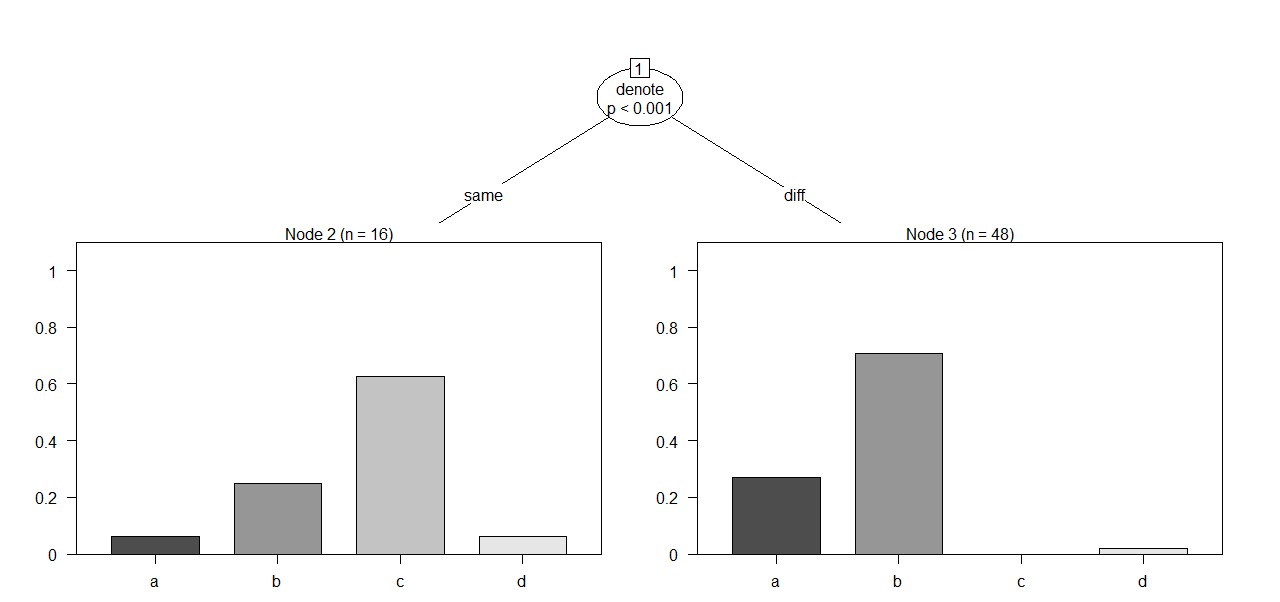

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            1.746974e-01
cc_means          9.547979e-03
length_of_clause  2.984125e-03
neg               1.260911e-03
voice             4.545455e-05
main              0.000000e+00
anim             -4.617829e-03


### Dibdin

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=dibdin)
plot(tree)

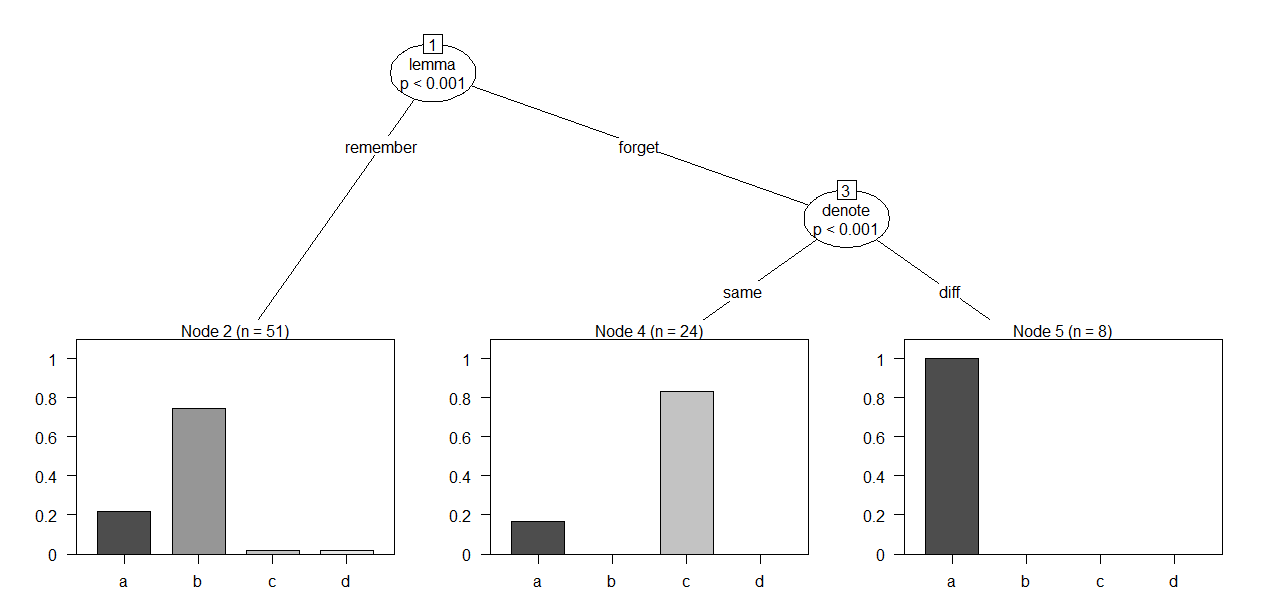

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=dibdin,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
lemma             2.619525e-01
denote            8.272903e-02
cc_means          2.128144e-02
length_of_clause  5.292538e-03
anim              2.430295e-03
neg               2.073546e-03
main             -7.289051e-05
voice            -3.738292e-04



In [ ]:
#### Dibdin - forget

In [ ]:
forget <- dibdin[ which(dibdin$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

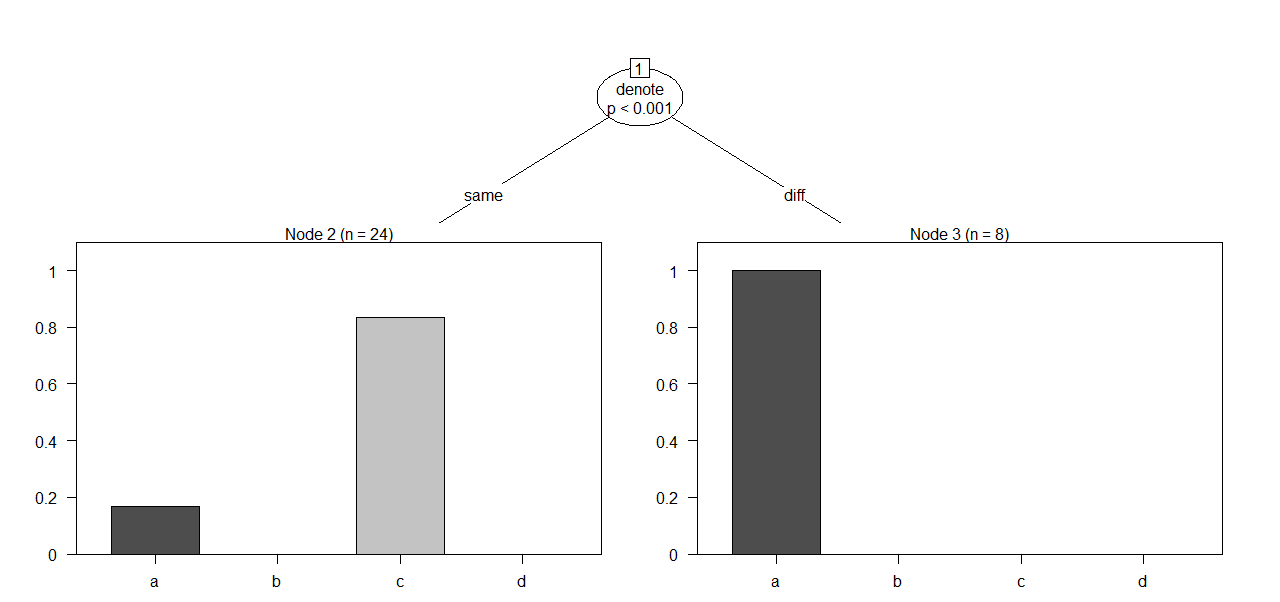

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                     Overall
denote           0.193408108
cc_means         0.055806453
length_of_clause 0.001947430
anim             0.001313690
neg              0.001022156
voice            0.000000000
main             0.000000000


In [ ]:
#### Dibdin - remember

In [ ]:
remember <- dibdin[ which(dibdin$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

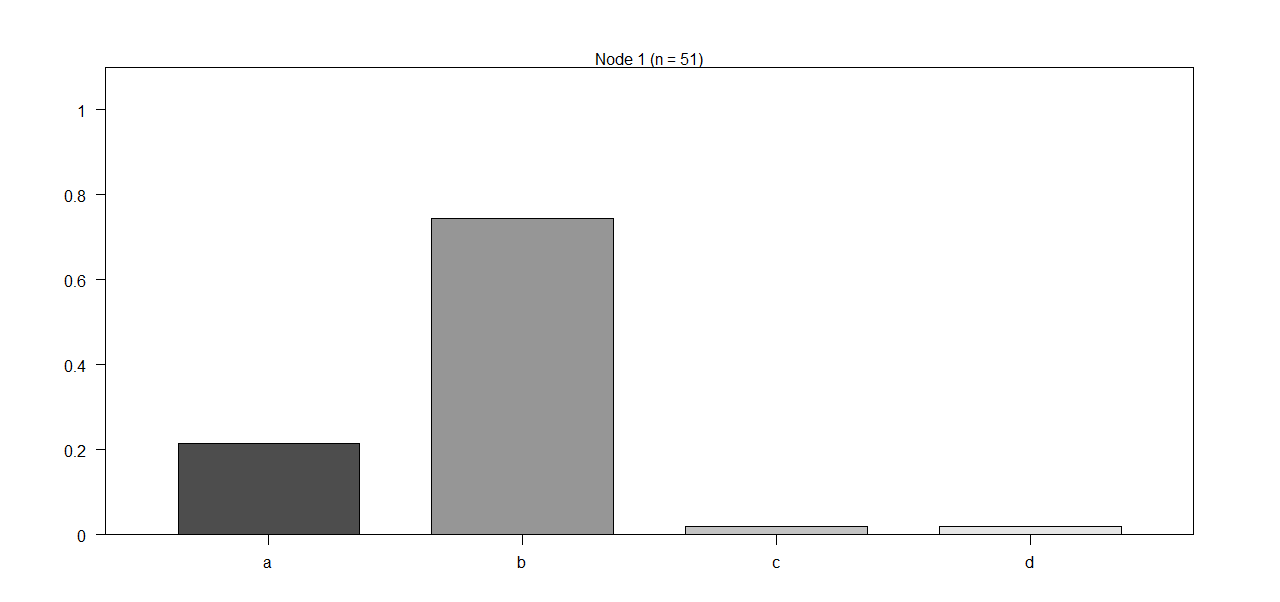

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
length_of_clause  1.143091e-02
neg               1.335770e-03
cc_means          6.782235e-05
main              0.000000e+00
anim             -4.047093e-04
denote           -7.920720e-04
voice            -8.244152e-04


### Gibbon

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=gibbon)
plot(tree)

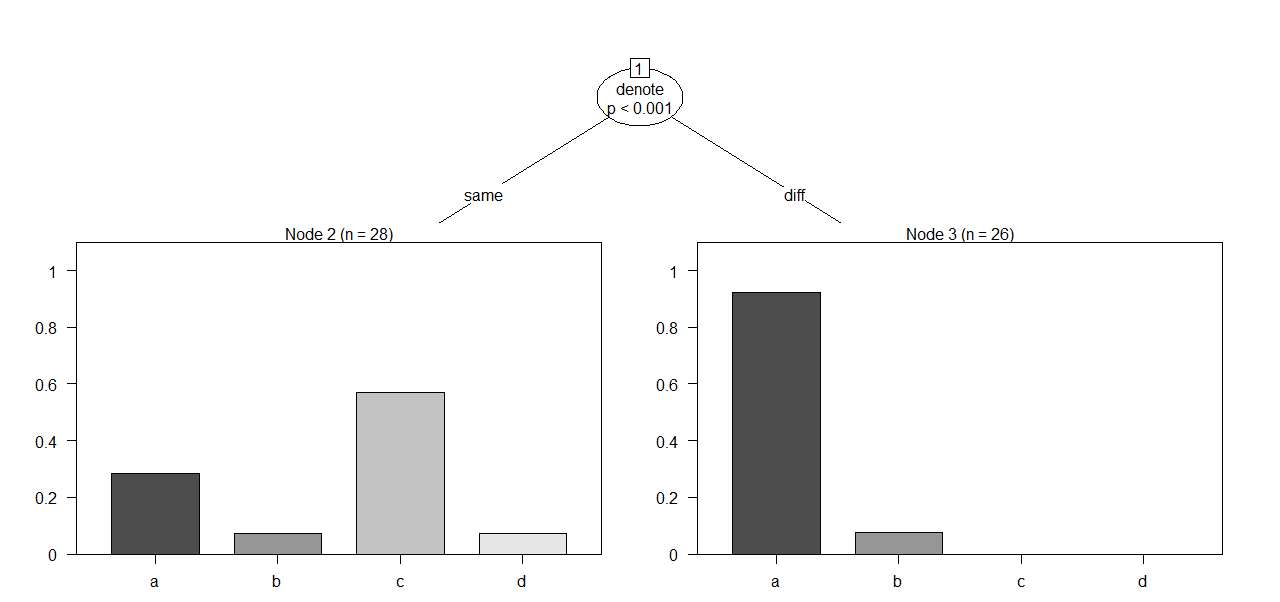

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=gibbon,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                      Overall
denote           1.831795e-01
lemma            3.984579e-02
cc_means         1.506012e-02
length_of_clause 5.748252e-03
voice            1.997243e-03
anim             9.285714e-05
neg              8.333333e-05
main             0.000000e+00


In [ ]:
#### Gibbon - forget

In [ ]:
forget <- gibbon[ which(gibbon$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

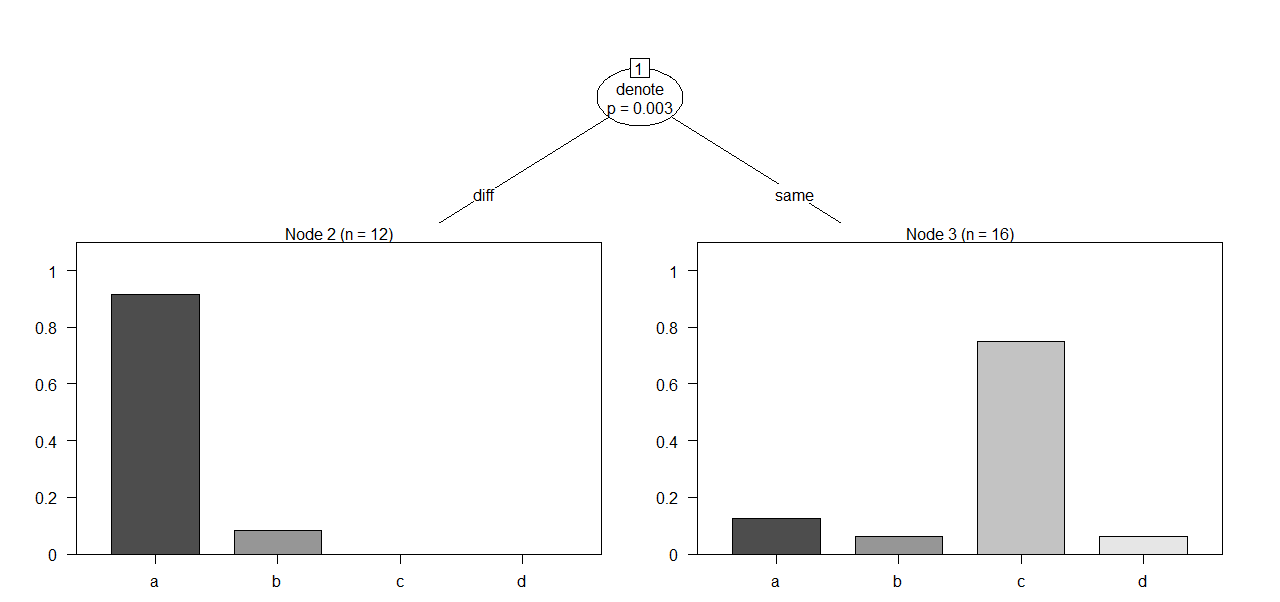

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                      Overall
denote           0.3572617660
cc_means         0.0074366300
length_of_clause 0.0002388889
voice            0.0000000000
anim             0.0000000000
neg              0.0000000000
main             0.0000000000


In [ ]:
#### Gibbon - remember

In [ ]:
remember <- gibbon[ which(gibbon$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

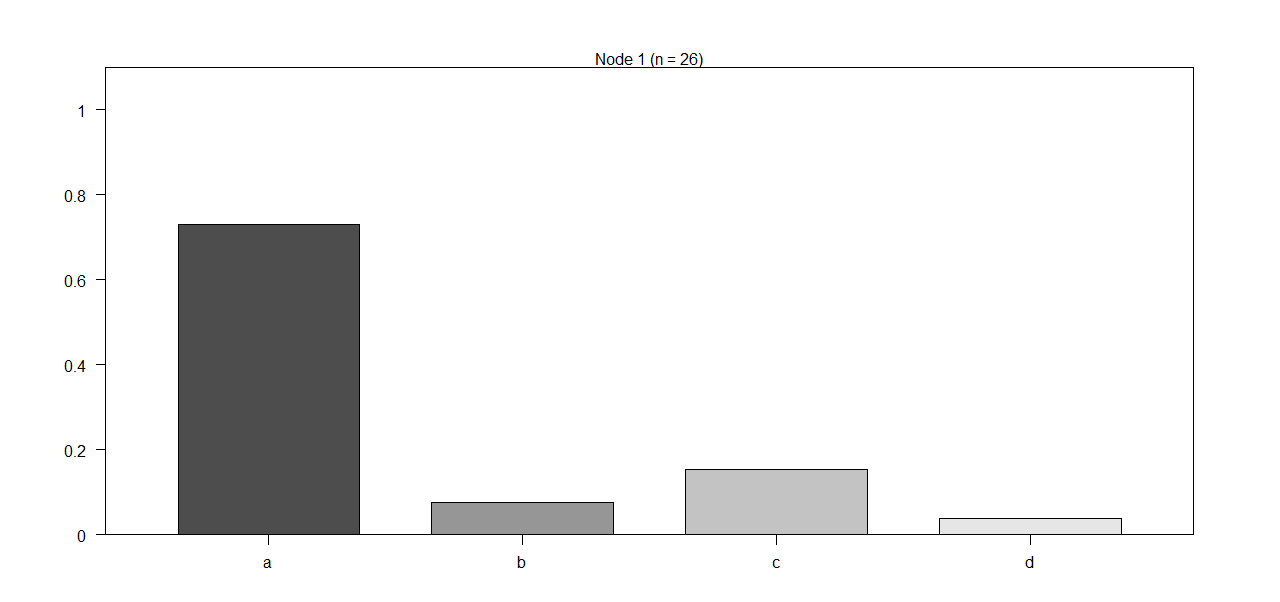

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            0.0161505384
neg               0.0008290404
length_of_clause  0.0005893939
voice             0.0004333333
main              0.0000000000
anim             -0.0003333333
cc_means         -0.0015585859


### Richardson

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=richardson)
plot(tree)

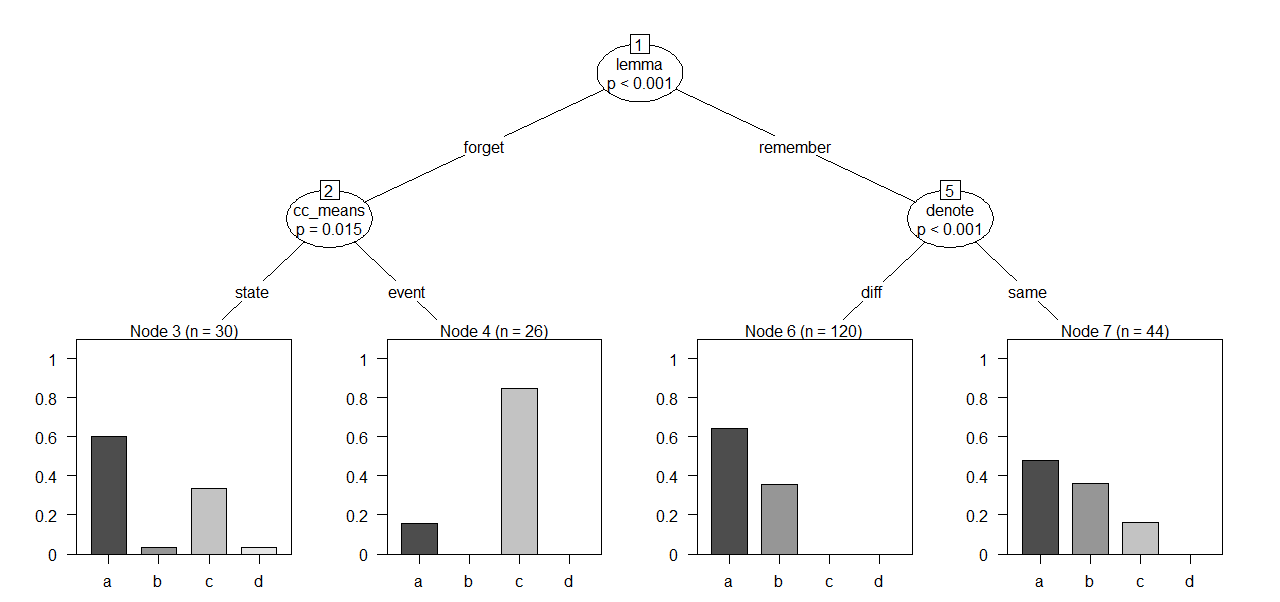

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=richardson,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                     Overall
lemma            0.104343105
cc_means         0.034642664
denote           0.019945524
length_of_clause 0.014047734
neg              0.009683384
anim             0.009663680
main             0.005263528
voice            0.000000000


In [ ]:
#### Richardson - forget

In [ ]:
forget <- richardson[ which(richardson$lemma=='forget'), ]

tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

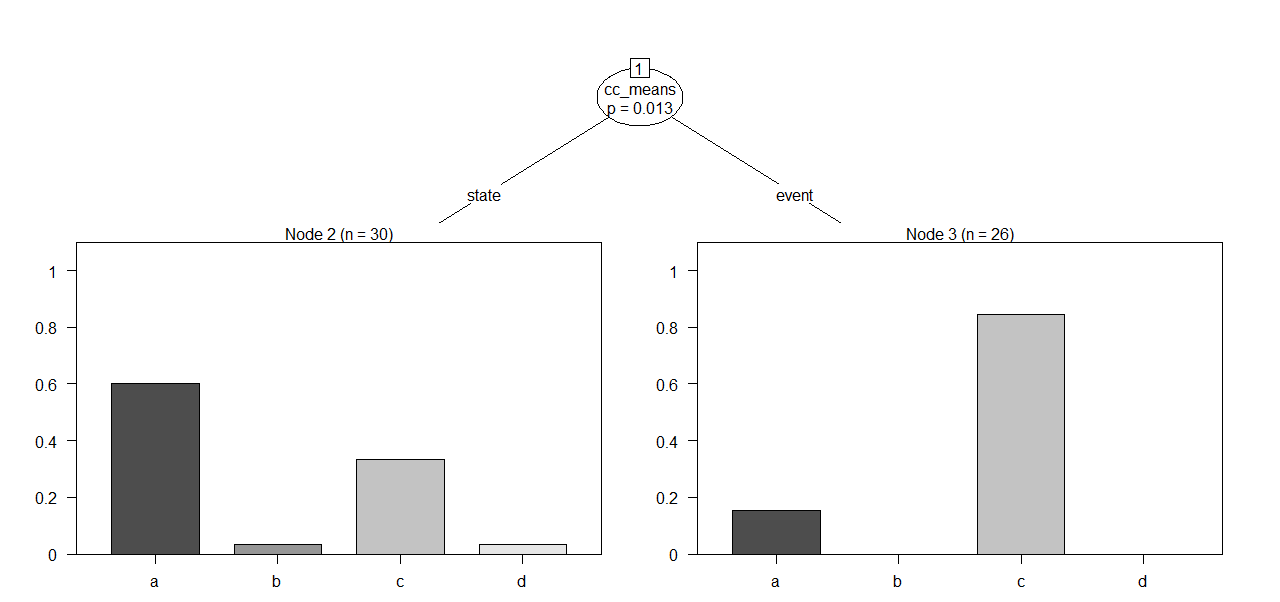

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                      Overall
cc_means          0.149861096
neg               0.058644134
denote            0.041413867
voice             0.000000000
anim              0.000000000
main              0.000000000
length_of_clause -0.002069366


In [ ]:
#### Richardson - remember

In [ ]:
remember <- richardson[ which(richardson$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

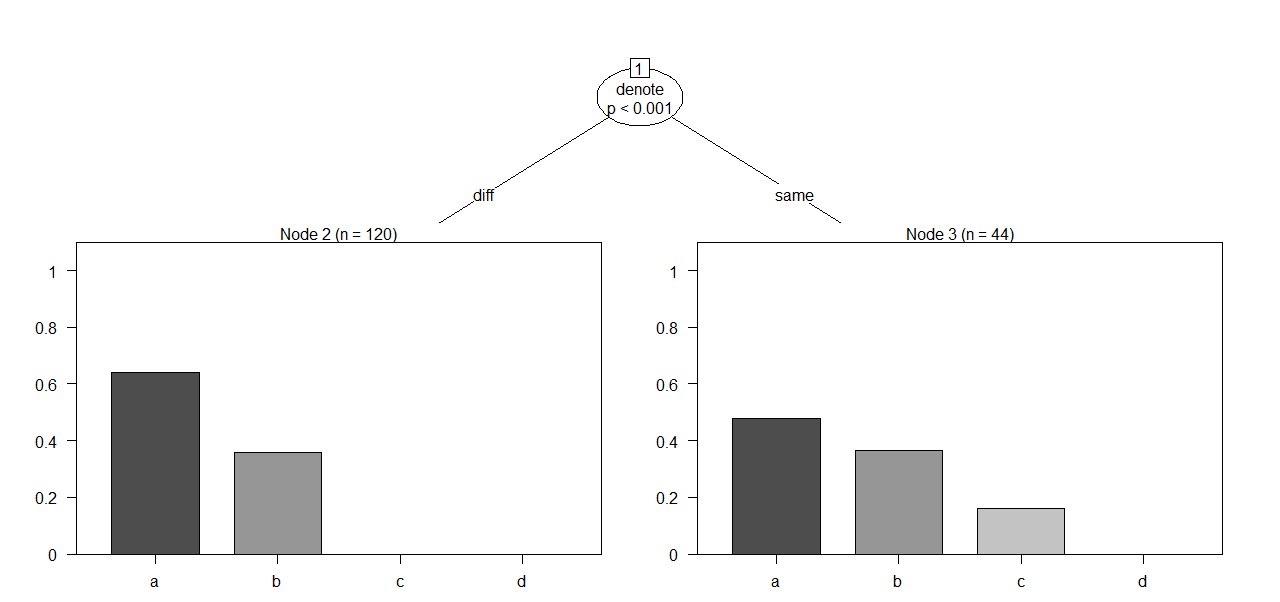

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
length_of_clause  1.840012e-02
anim              1.017405e-02
main              1.039020e-03
voice            -3.252247e-05
neg              -1.506550e-03
cc_means         -3.444449e-03
denote           -3.979251e-03


### Trusler

In [ ]:
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + lemma + denote + length_of_clause, data=trusler)
plot(tree)

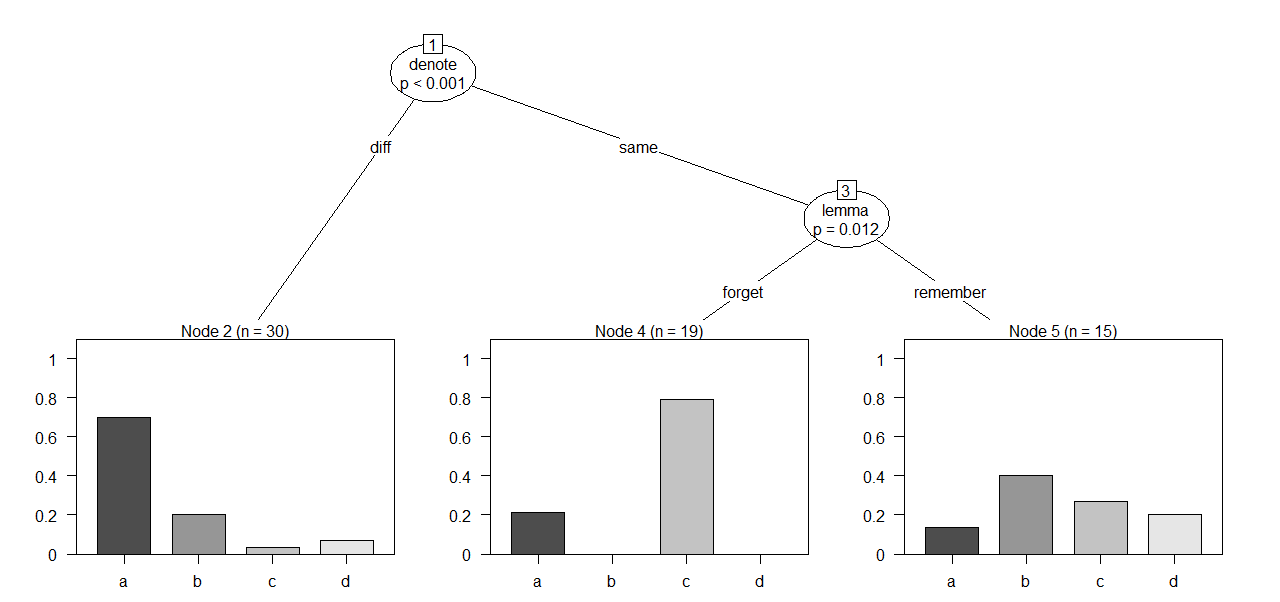

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + lemma + length_of_clause, data=trusler,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
denote            0.0788713444
lemma             0.0700751380
anim              0.0544161981
main              0.0379377645
cc_means          0.0253429178
voice             0.0004203405
length_of_clause -0.0001931608
neg              -0.0002019039



In [ ]:
#### Trusler - forget

In [ ]:
forget <- trusler[ which(trusler$lemma=='forget'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget)
plot(tree)

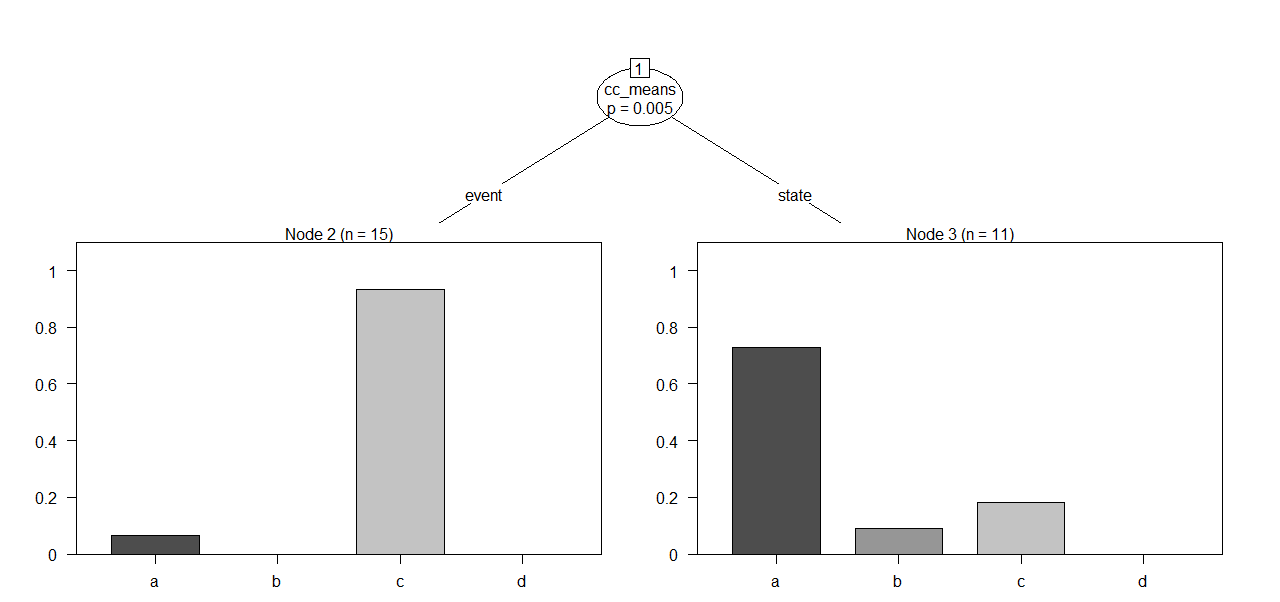

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=forget,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                      Overall
cc_means         0.2799918831
denote           0.0116386169
neg              0.0018082945
anim             0.0001111111
voice            0.0000000000
main             0.0000000000
length_of_clause 0.0000000000


In [ ]:
#### Trusler - remember

In [ ]:
remember <- trusler[ which(trusler$lemma=='remember'), ]
tree <- ctree(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember)
plot(tree)

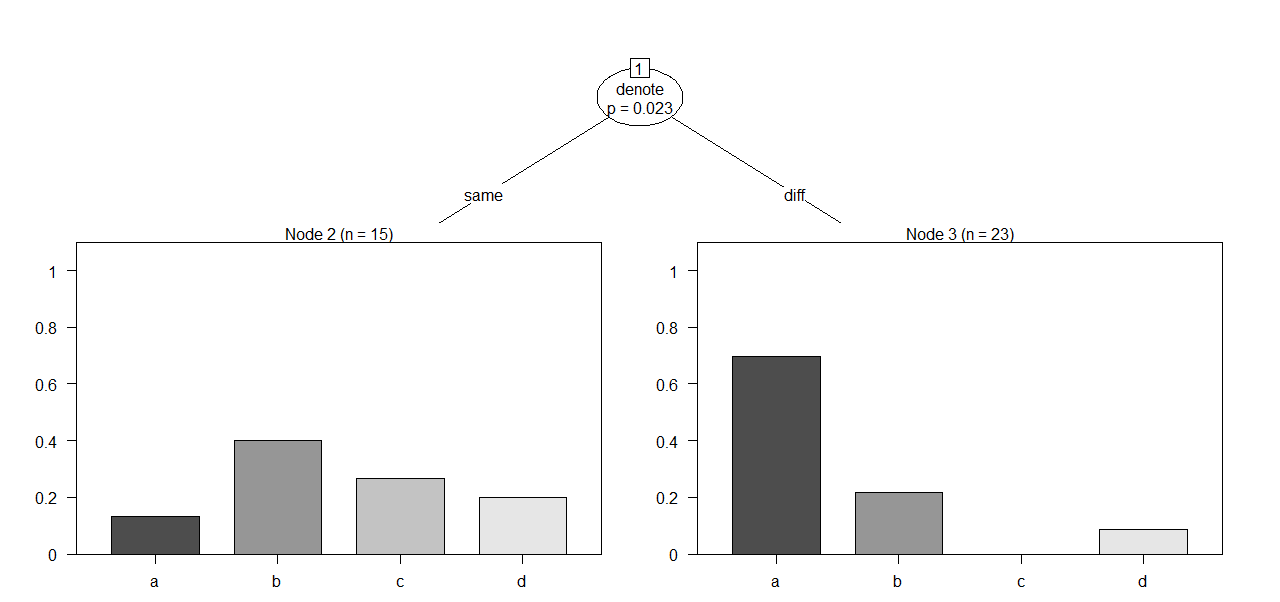

In [ ]:
forest <- cforest(complementation_cxn ~ voice + anim + neg + main + cc_means + denote + length_of_clause, data=remember,
                        controls=cforest_control(mtry = 7, ntree=1000))
var <- varImp(forest)
var_ordered <- var %>% arrange(desc(Overall))
print(var_ordered)

In [ ]:
                       Overall
anim              8.482607e-02
denote            4.638364e-02
main              4.909451e-03
voice             7.142857e-05
length_of_clause -3.351666e-03
neg              -4.261532e-03
cc_means         -5.957008e-03
